In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

In [2]:
feat_file=pd.read_csv('cancer_preprocess.csv')

In [3]:
feat_file.head()

,A1_0,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,...,E5_118,E5_119,E5_120,E5_121,E5_122,E5_123,E5_124,E5_125,E5_126,E5_127
0,0.183793,0.239916,0.850030,0.210690,0.896150,0.866617,0.860076,0.115359,0.374133,0.927302,...,0.793461,0.576311,0.189772,0.784201,0.335585,0.644900,0.301631,0.547792,0.479534,0.308149
1,0.908285,0.882967,0.804499,0.167710,0.854424,0.773797,0.818178,0.146237,0.822128,0.880442,...,0.792318,0.645596,0.668128,0.267654,0.732278,0.791278,0.680896,0.315371,0.368137,0.192646
2,0.187789,0.896291,0.089300,0.872091,0.140625,0.809294,0.833710,0.439762,0.836772,0.120445,...,0.594850,0.744443,0.246511,0.767050,0.736697,0.710731,0.586913,0.777560,0.706049,0.311375
3,0.911319,0.907869,0.831656,0.767504,0.886981,0.589135,0.704022,0.613958,0.852084,0.481431,...,0.593676,0.227899,0.264702,0.535805,0.480239,0.731689,0.799642,0.856727,0.824530,0.582091
4,0.181163,0.800212,0.827693,0.149731,0.739144,0.843704,0.841885,0.127548,0.112236,0.898438,...,0.391759,0.808125,0.147298,0.859803,0.620034,0.734427,0.126441,0.508898,0.552177,0.360427


In [4]:
feat_file.shape

(2129, 3200)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 3200)

In [10]:
X_train_filtered=pd.read_csv('min_acqui_20(5)_train.csv')

In [11]:
X_train_filtered.head()

,C1_38,E5_76,E5_115,B1_49,E2_110
0,0.212478,0.279828,0.261576,0.775206,0.256336
1,0.162738,0.590881,0.748399,0.451095,0.551804
2,0.179826,0.203237,0.166396,0.310715,0.674723
3,0.094332,0.484300,0.477457,0.156854,0.025239
4,0.885150,0.779179,0.739280,0.081960,0.487714


In [12]:
X_test_filtered=pd.read_csv('min_acqui_20(5)_test.csv')

In [13]:
X_test_filtered.head()

,C1_38,E5_76,E5_115,B1_49,E2_110
0,0.143825,0.337419,0.469675,0.128171,0.578250
1,0.192017,0.305673,0.552305,0.196892,0.536343
2,0.667500,0.833356,0.852054,0.140982,0.875337
3,0.143980,0.172514,0.484417,0.189358,0.867293
4,0.145960,0.748871,0.852283,0.088803,0.102355


## RFC

In [14]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values=forest.predict_proba(X_test_filtered)

In [15]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[112  87]
 [ 85 142]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5685    0.5628    0.5657       199
           1     0.6201    0.6256    0.6228       227

    accuracy                         0.5962       426
   macro avg     0.5943    0.5942    0.5942       426
weighted avg     0.5960    0.5962    0.5961       426



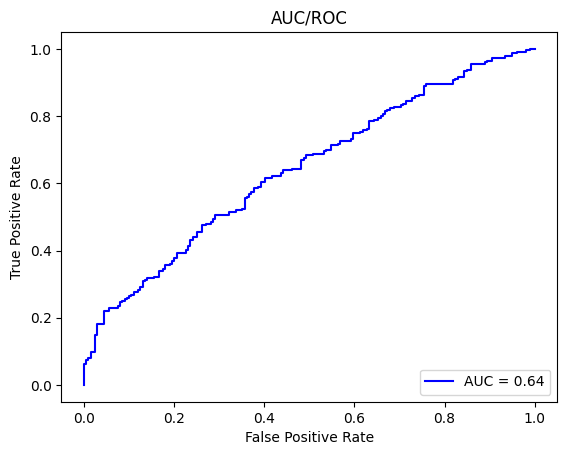

In [16]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)
y_prediction_values=KNN.predict_proba(X_test_filtered)

In [18]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa=knn_kappa_train
knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[106  93]
 [ 91 136]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5381    0.5327    0.5354       199
           1     0.5939    0.5991    0.5965       227

    accuracy                         0.5681       426
   macro avg     0.5660    0.5659    0.5659       426
weighted avg     0.5678    0.5681    0.5679       426



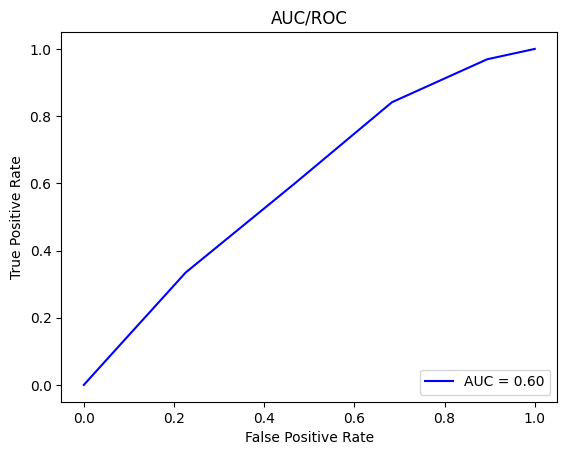

In [19]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [20]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)
y_prediction_values=model.predict_proba(X_test_filtered)

In [21]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
svc_kappa=knn_kappa_train
svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
svc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 89 110]
 [ 62 165]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5894    0.4472    0.5086       199
           1     0.6000    0.7269    0.6574       227

    accuracy                         0.5962       426
   macro avg     0.5947    0.5871    0.5830       426
weighted avg     0.5951    0.5962    0.5879       426



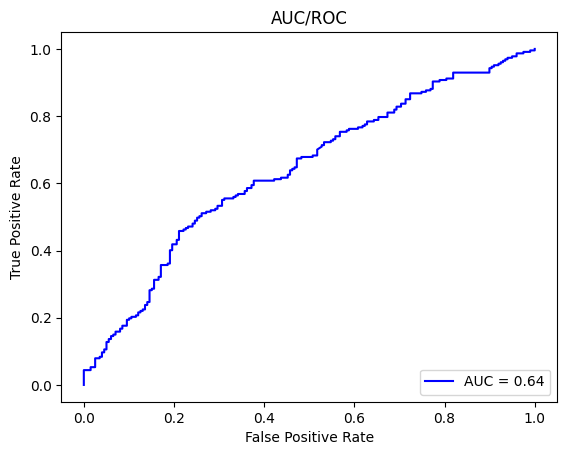

In [22]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)
y_prediction_values=lr.predict_proba(X_test_filtered)

In [24]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lr_kappa=knn_kappa_train
lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lr_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 90 109]
 [ 60 167]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6000    0.4523    0.5158       199
           1     0.6051    0.7357    0.6640       227

    accuracy                         0.6033       426
   macro avg     0.6025    0.5940    0.5899       426
weighted avg     0.6027    0.6033    0.5948       426



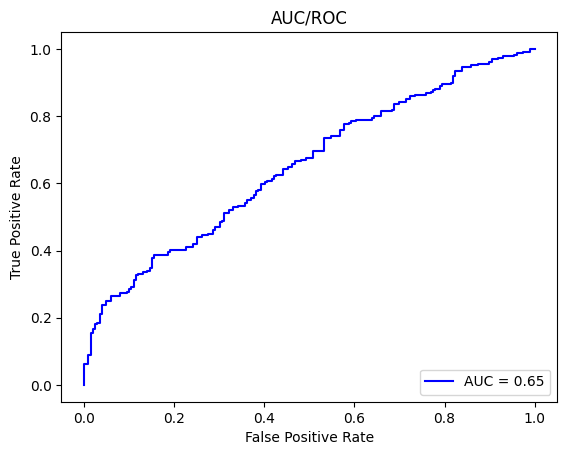

In [25]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values=xgb.predict_proba(X_test_filtered)

[11:39:49] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [27]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)
xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
xgb_kappa=knn_kappa_train
xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
xgb_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[109  90]
 [ 87 140]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5561    0.5477    0.5519       199
           1     0.6087    0.6167    0.6127       227

    accuracy                         0.5845       426
   macro avg     0.5824    0.5822    0.5823       426
weighted avg     0.5841    0.5845    0.5843       426



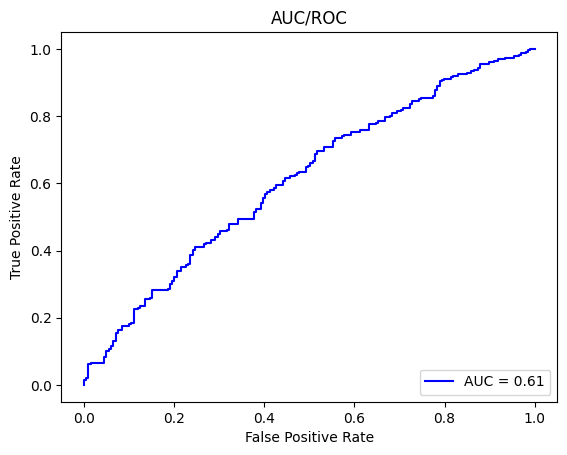

In [28]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values=clf.predict_proba(X_test_filtered)

In [30]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
clf_kappa=knn_kappa_train
clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
clf_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 84 115]
 [ 58 169]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5915    0.4221    0.4927       199
           1     0.5951    0.7445    0.6614       227

    accuracy                         0.5939       426
   macro avg     0.5933    0.5833    0.5771       426
weighted avg     0.5934    0.5939    0.5826       426



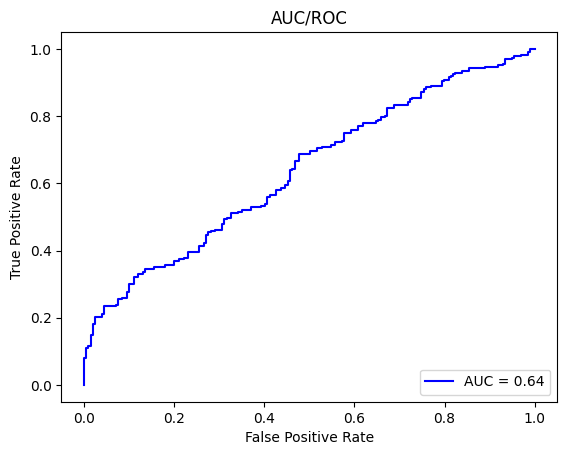

In [31]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values=mlp.predict_proba(X_test_filtered)

In [33]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)
mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
mlp_kappa=knn_kappa_train
mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
mlp_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 88 111]
 [ 61 166]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5906    0.4422    0.5057       199
           1     0.5993    0.7313    0.6587       227

    accuracy                         0.5962       426
   macro avg     0.5949    0.5867    0.5822       426
weighted avg     0.5952    0.5962    0.5873       426



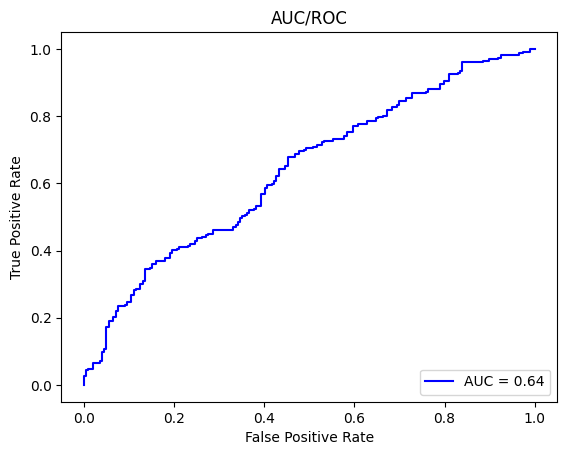

In [34]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values=etc.predict_proba(X_test_filtered)

In [36]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)
etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
etc_kappa=knn_kappa_train
etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
etc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[121  78]
 [ 79 148]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6050    0.6080    0.6065       199
           1     0.6549    0.6520    0.6534       227

    accuracy                         0.6315       426
   macro avg     0.6299    0.6300    0.6300       426
weighted avg     0.6316    0.6315    0.6315       426



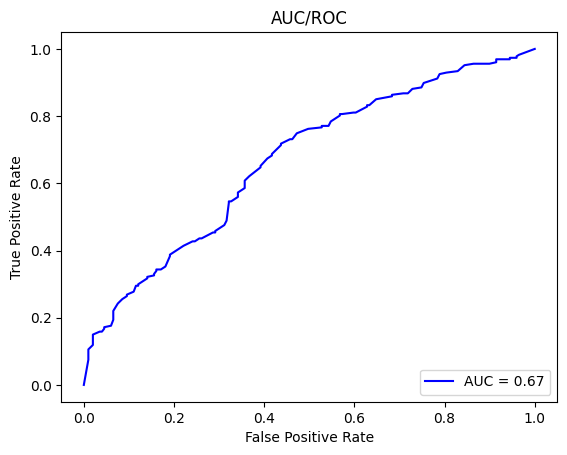

In [37]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [38]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)
y_prediction_values=dtc.predict_proba(X_test_filtered)
                            

In [39]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)
dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
dtc_kappa=knn_kappa_train
dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
dtc_kappa=knn_kappa_test
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[122  77]
 [103 124]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5422    0.6131    0.5755       199
           1     0.6169    0.5463    0.5794       227

    accuracy                         0.5775       426
   macro avg     0.5796    0.5797    0.5775       426
weighted avg     0.5820    0.5775    0.5776       426



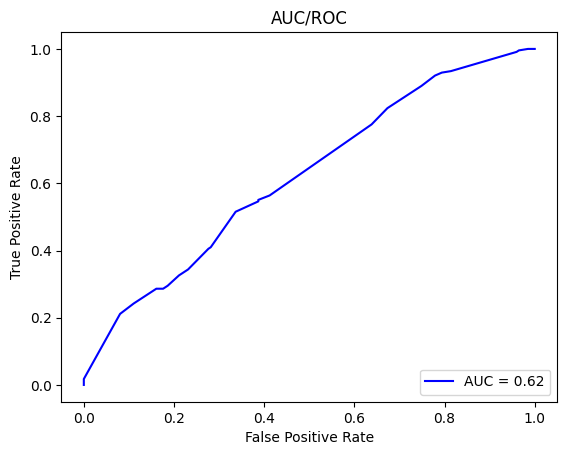

In [40]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)
y_prediction_values=lda.predict_proba(X_test_filtered)
                            

In [42]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)
lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lda_kappa=knn_kappa_train
lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lda_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 89 110]
 [ 60 167]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5973    0.4472    0.5115       199
           1     0.6029    0.7357    0.6627       227

    accuracy                         0.6009       426
   macro avg     0.6001    0.5915    0.5871       426
weighted avg     0.6003    0.6009    0.5921       426



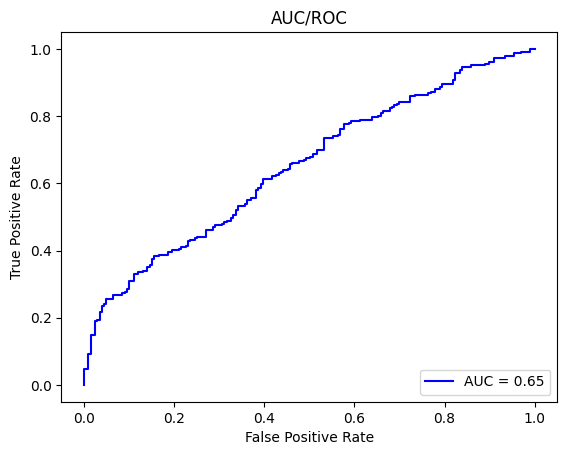

In [43]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [44]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
df_train = pd.DataFrame(data_train)

In [45]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa],
               'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
             
             
df_test = pd.DataFrame(data_test)             

In [46]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC
0,RFC,69.583089,0.391254,0.695618,0.706085,0.701254,0.391244,0.640626
1,KNN,74.456841,0.488439,0.744059,0.745011,0.766249,0.488228,0.601111
2,SVC,63.652378,0.276733,0.626573,0.616848,0.776511,0.266534,0.638457
3,LR,62.947739,0.261844,0.619483,0.611615,0.768529,0.252368,0.649702
4,XGB,93.188491,0.863638,0.931814,0.931896,0.936146,0.863628,0.610785
5,GNB,63.182619,0.269903,0.618525,0.609266,0.794755,0.255999,0.636686
6,MLP,64.474457,0.293370,0.635585,0.624088,0.779932,0.283326,0.637859
7,ETC,99.706400,0.994124,0.997061,0.997717,0.996579,0.994123,0.667855
8,DTC,66.999413,0.350092,0.668429,0.722144,0.583808,0.343280,0.620824
9,LDA,63.065179,0.264690,0.620239,0.611913,0.773090,0.254579,0.650012


In [47]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC
0,RFC,59.624413,0.188490,0.594232,0.620087,0.625551,0.188482,0.640626
1,KNN,56.807512,0.131870,0.565922,0.593886,0.599119,0.131864,0.601111
2,SVC,59.624413,0.181595,0.582971,0.600000,0.726872,0.176738,0.638457
3,LR,60.328638,0.196322,0.589888,0.605072,0.735683,0.190842,0.649702
4,XGB,58.450704,0.164648,0.582295,0.608696,0.616740,0.164632,0.610785
5,GNB,59.389671,0.176328,0.577058,0.595070,0.744493,0.169600,0.636686
6,MLP,59.624413,0.181500,0.582239,0.599278,0.731278,0.176219,0.637859
7,ETC,63.145540,0.259945,0.629969,0.654867,0.651982,0.259942,0.667855
8,DTC,57.746479,0.159229,0.577455,0.616915,0.546256,0.158047,0.620824
9,LDA,60.093897,0.191366,0.587096,0.602888,0.735683,0.131864,0.650012
